In [4]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [5]:

result = pd.read_csv('result_grid.csv')

In [6]:
result[['city','country']] =result['place'].str.split(',',expand=True)
result["city"]= result["city"].replace('Copenhagen Municipality', "Copenhagen") 
result

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country
0,"Utrecht, Netherlands",42.134807,84.252566,1.847390,13.659420,10.0,160856.0,0.0,Utrecht,Netherlands
1,"Munster, Germany",40.890615,85.080321,4.618474,16.779081,36.0,1027872.0,0.0,Munster,Germany
2,"Antwerp, Belgium",38.126370,80.786001,2.771084,13.883580,9.0,76499.0,2.0,Antwerp,Belgium
3,"Copenhagen Municipality,Denmark",42.485738,82.811245,0.923695,18.035509,8.0,172755.0,0.0,Copenhagen,Denmark
4,"Amsterdam, Netherlands",37.934032,92.141901,0.000000,13.556881,13.0,162263.0,2.0,Amsterdam,Netherlands
5,"Malmo, Sweden",31.604821,73.110219,1.154618,10.188496,12.0,177625.0,2.0,Malmo,Sweden
6,"Bern, Switzerland",39.426975,89.397590,2.519168,19.631488,8.0,118485.0,0.0,Bern,Switzerland
7,"Bremen, Germany",37.148215,79.049531,4.105310,18.370042,3.0,16359.0,1.0,Bremen,Germany
8,"Hannover, Germany",38.941232,87.965194,1.026328,16.804034,14.0,191737.0,0.0,Hannover,Germany
9,"Strasbourg, France",33.000004,81.579652,1.154618,13.691907,9.0,129878.0,1.0,Strasbourg,France


In [7]:
coya =pd.read_csv('coya.csv')
coya

,Unnamed: 0,city,country,total_score,bike_infrastructure,bike_use_percent,road_quality
0,0,Utrecht,Netherlands,77.84,57.51,51.0,60.78
1,1,Munster,Germany,65.93,51.23,39.1,53.05
2,2,Antwerp,Belgium,60.51,34.28,28.9,53.37
3,3,Copenhagen,Denmark,60.46,55.23,29.0,61.60
4,4,Amsterdam,Netherlands,60.24,55.90,32.0,61.71
5,5,Malmo,Sweden,55.88,46.55,30.0,52.40
6,6,Hangzhou,China,52.55,32.72,30.0,35.06
7,7,Bern,Switzerland,48.76,65.10,15.0,65.46
8,8,Bremen,Germany,47.81,59.78,21.0,55.96
9,9,Hannover,Germany,46.70,53.68,19.0,51.51


In [8]:
df = result.merge(coya, on="city", how = 'inner')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country_x,country_y,total_score,bike_infrastructure,bike_use_percent,road_quality
0,"Utrecht, Netherlands",42.134807,84.252566,1.847390,13.659420,10.0,160856.0,0.0,Utrecht,Netherlands,Netherlands,77.84,57.51,51.0,60.78
1,"Munster, Germany",40.890615,85.080321,4.618474,16.779081,36.0,1027872.0,0.0,Munster,Germany,Germany,65.93,51.23,39.1,53.05
2,"Antwerp, Belgium",38.126370,80.786001,2.771084,13.883580,9.0,76499.0,2.0,Antwerp,Belgium,Belgium,60.51,34.28,28.9,53.37
3,"Copenhagen Municipality,Denmark",42.485738,82.811245,0.923695,18.035509,8.0,172755.0,0.0,Copenhagen,Denmark,Denmark,60.46,55.23,29.0,61.60
4,"Amsterdam, Netherlands",37.934032,92.141901,0.000000,13.556881,13.0,162263.0,2.0,Amsterdam,Netherlands,Netherlands,60.24,55.90,32.0,61.71
5,"Malmo, Sweden",31.604821,73.110219,1.154618,10.188496,12.0,177625.0,2.0,Malmo,Sweden,Sweden,55.88,46.55,30.0,52.40
6,"Bern, Switzerland",39.426975,89.397590,2.519168,19.631488,8.0,118485.0,0.0,Bern,Switzerland,Switzerland,48.76,65.10,15.0,65.46
7,"Bremen, Germany",37.148215,79.049531,4.105310,18.370042,3.0,16359.0,1.0,Bremen,Germany,Germany,47.81,59.78,21.0,55.96
8,"Hannover, Germany",38.941232,87.965194,1.026328,16.804034,14.0,191737.0,0.0,Hannover,Germany,Germany,46.70,53.68,19.0,51.51
9,"Strasbourg, France",33.000004,81.579652,1.154618,13.691907,9.0,129878.0,1.0,Strasbourg,France,France,45.45,56.44,16.0,58.82


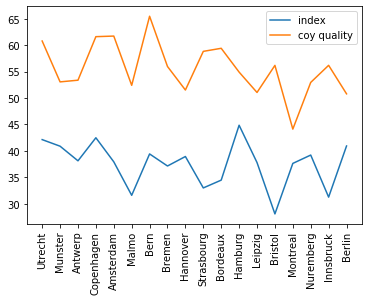

In [14]:
plt.plot(df['city'], df['average_index'], label = 'index')
plt.plot(df['city'], df['road_quality'], label = 'coy quality' )
#plt.plot(df['city'], df['bike_use_percent'])
#plt.plot(df['city'], df['bike_infrastructure'], label = 'coy infrastructure')
#plt.plot(df['city'], df['total_score'])
plt.xticks(rotation = 90)
plt.legend(loc = 'top right')

In [3]:
df.dtypes

NameError: name 'df' is not defined